### Exercici 1
#### Agafa un conjunt de dades de tema esportiu que t'agradi. Realitza un mostreig de les dades generant una mostra aleatòria simple i una mostra sistemàtica.

In [1]:
import numpy as np #library for scientific computing
import pandas as pd #library for dataframes 
import matplotlib.pyplot as plt #graphic library
import seaborn as sns #advanced graphic library based on matplotlib
import warnings #library to manage warnings

warnings.filterwarnings('ignore')

In [2]:
#we obtain the dataset from Kaggle (https://www.kaggle.com/rajeevw/ufcdata)
#the dataset is about UFC-Fight historical data from 1993 to 2021. UFC is a Mixed Martial Arts USA league.

df_ufc = pd.read_csv('ufc.csv') 

df_ufc.head()

,R_fighter,B_fighter,Referee,date,location,Winner,title_bout,weight_class,B_avg_KD,B_avg_opp_KD,...,R_win_by_Decision_Unanimous,R_win_by_KO/TKO,R_win_by_Submission,R_win_by_TKO_Doctor_Stoppage,R_Stance,R_Height_cms,R_Reach_cms,R_Weight_lbs,B_age,R_age
0,Adrian Yanez,Gustavo Lopez,Chris Tognoni,2021-03-20,"Las Vegas, Nevada, USA",Red,False,Bantamweight,0.000,0.0,...,0,1,0,0,Orthodox,170.18,177.80,135.0,31.0,27.0
1,Trevin Giles,Roman Dolidze,Herb Dean,2021-03-20,"Las Vegas, Nevada, USA",Red,False,Middleweight,0.500,0.0,...,0,3,0,0,Orthodox,182.88,187.96,185.0,32.0,28.0
2,Tai Tuivasa,Harry Hunsucker,Herb Dean,2021-03-20,"Las Vegas, Nevada, USA",Red,False,Heavyweight,NaN,NaN,...,1,3,0,0,Southpaw,187.96,190.50,264.0,32.0,28.0
3,Cheyanne Buys,Montserrat Conejo,Mark Smith,2021-03-20,"Las Vegas, Nevada, USA",Blue,False,WomenStrawweight,NaN,NaN,...,0,0,0,0,Switch,160.02,160.02,115.0,28.0,25.0
4,Marion Reneau,Macy Chiasson,Mark Smith,2021-03-20,"Las Vegas, Nevada, USA",Blue,False,WomenBantamweight,0.125,0.0,...,1,2,2,0,Orthodox,167.64,172.72,135.0,29.0,43.0


In [3]:
print("Shape (rows x columns): " + str(df_ufc.shape))
print("Dimensions: " + str(df_ufc.ndim))
print("Columns: " + str(df_ufc.columns))
print('Nan values per variable:' + str(df_ufc.isna().sum()))

Shape (rows x columns): (6012, 144)
Dimensions: 2
Columns: Index(['R_fighter', 'B_fighter', 'Referee', 'date', 'location', 'Winner',
       'title_bout', 'weight_class', 'B_avg_KD', 'B_avg_opp_KD',
       ...
       'R_win_by_Decision_Unanimous', 'R_win_by_KO/TKO', 'R_win_by_Submission',
       'R_win_by_TKO_Doctor_Stoppage', 'R_Stance', 'R_Height_cms',
       'R_Reach_cms', 'R_Weight_lbs', 'B_age', 'R_age'],
      dtype='object', length=144)
Nan values per variable:R_fighter         0
B_fighter         0
Referee          32
date              0
location          0
               ... 
R_Height_cms      4
R_Reach_cms     406
R_Weight_lbs      2
B_age           172
R_age            63
Length: 144, dtype: int64


In [4]:
#there are 6012 observations (fights) and 144 variables. There are too many variables (columns).
print(df_ufc.columns[0:100])
print(df_ufc.columns[101:])

Index(['R_fighter', 'B_fighter', 'Referee', 'date', 'location', 'Winner',
       'title_bout', 'weight_class', 'B_avg_KD', 'B_avg_opp_KD',
       'B_avg_SIG_STR_pct', 'B_avg_opp_SIG_STR_pct', 'B_avg_TD_pct',
       'B_avg_opp_TD_pct', 'B_avg_SUB_ATT', 'B_avg_opp_SUB_ATT', 'B_avg_REV',
       'B_avg_opp_REV', 'B_avg_SIG_STR_att', 'B_avg_SIG_STR_landed',
       'B_avg_opp_SIG_STR_att', 'B_avg_opp_SIG_STR_landed',
       'B_avg_TOTAL_STR_att', 'B_avg_TOTAL_STR_landed',
       'B_avg_opp_TOTAL_STR_att', 'B_avg_opp_TOTAL_STR_landed', 'B_avg_TD_att',
       'B_avg_TD_landed', 'B_avg_opp_TD_att', 'B_avg_opp_TD_landed',
       'B_avg_HEAD_att', 'B_avg_HEAD_landed', 'B_avg_opp_HEAD_att',
       'B_avg_opp_HEAD_landed', 'B_avg_BODY_att', 'B_avg_BODY_landed',
       'B_avg_opp_BODY_att', 'B_avg_opp_BODY_landed', 'B_avg_LEG_att',
       'B_avg_LEG_landed', 'B_avg_opp_LEG_att', 'B_avg_opp_LEG_landed',
       'B_avg_DISTANCE_att', 'B_avg_DISTANCE_landed', 'B_avg_opp_DISTANCE_att',
       'B_avg_opp_

In [5]:
#We select some columns, the most significant ones
df_ufc_short = df_ufc[['R_fighter', 'B_fighter', 'date', 'location', 'Referee', 'Winner','title_bout', 'weight_class', 
                       'B_age', 'R_age', 'B_wins', 'R_wins','B_losses', 'R_losses','B_draw', 'R_draw', 'B_Stance', 'R_Stance', 
                       'B_Height_cms', 'R_Height_cms','B_Reach_cms', 'R_Reach_cms', 'B_Weight_lbs',  'R_Weight_lbs', 
                       'B_win_by_KO/TKO', 'B_win_by_Submission','B_win_by_TKO_Doctor_Stoppage', 'B_win_by_Decision_Majority', 'B_win_by_Decision_Split','B_win_by_Decision_Unanimous',
                       'R_win_by_Decision_Majority', 'R_win_by_Decision_Split', 'R_win_by_Decision_Unanimous', 'R_win_by_KO/TKO', 'R_win_by_Submission','R_win_by_TKO_Doctor_Stoppage']]
df_ufc_short

,R_fighter,B_fighter,date,location,Referee,Winner,title_bout,weight_class,B_age,R_age,...,B_win_by_TKO_Doctor_Stoppage,B_win_by_Decision_Majority,B_win_by_Decision_Split,B_win_by_Decision_Unanimous,R_win_by_Decision_Majority,R_win_by_Decision_Split,R_win_by_Decision_Unanimous,R_win_by_KO/TKO,R_win_by_Submission,R_win_by_TKO_Doctor_Stoppage
0,Adrian Yanez,Gustavo Lopez,2021-03-20,"Las Vegas, Nevada, USA",Chris Tognoni,Red,False,Bantamweight,31.0,27.0,...,0,0,0,0,0,0,0,1,0,0
1,Trevin Giles,Roman Dolidze,2021-03-20,"Las Vegas, Nevada, USA",Herb Dean,Red,False,Middleweight,32.0,28.0,...,0,0,1,0,0,1,0,3,0,0
2,Tai Tuivasa,Harry Hunsucker,2021-03-20,"Las Vegas, Nevada, USA",Herb Dean,Red,False,Heavyweight,32.0,28.0,...,0,0,0,0,0,0,1,3,0,0
3,Cheyanne Buys,Montserrat Conejo,2021-03-20,"Las Vegas, Nevada, USA",Mark Smith,Blue,False,WomenStrawweight,28.0,25.0,...,0,0,0,0,0,0,0,0,0,0
4,Marion Reneau,Macy Chiasson,2021-03-20,"Las Vegas, Nevada, USA",Mark Smith,Blue,False,WomenBantamweight,29.0,43.0,...,0,0,0,1,0,0,1,2,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6007,Remco Pardoel,Alberta Cerra Leon,1994-03-11,"Denver, Colorado, USA",John McCarthy,Red,False,OpenWeight,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
6008,Orlando Wiet,Robert Lucarelli,1994-03-11,"Denver, Colorado, USA",John McCarthy,Red,False,OpenWeight,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
6009,Johnny Rhodes,David Levicki,1994-03-11,"Denver, Colorado, USA",John McCarthy,Red,False,OpenWeight,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
6010,Patrick Smith,Ray Wizard,1994-03-11,"Denver, Colorado, USA",John McCarthy,Red,False,OpenWeight,NaN,30.0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
df_ufc_short.describe(include='all')
#dataframe quantified information

,R_fighter,B_fighter,date,location,Referee,Winner,title_bout,weight_class,B_age,R_age,...,B_win_by_TKO_Doctor_Stoppage,B_win_by_Decision_Majority,B_win_by_Decision_Split,B_win_by_Decision_Unanimous,R_win_by_Decision_Majority,R_win_by_Decision_Split,R_win_by_Decision_Unanimous,R_win_by_KO/TKO,R_win_by_Submission,R_win_by_TKO_Doctor_Stoppage
count,6012,6012,6012,6012,5980,6012,6012,6012,5840.000000,5949.000000,...,6012.000000,6012.000000,6012.000000,6012.000000,6012.000000,6012.000000,6012.000000,6012.000000,6012.000000,6012.000000
unique,1514,1987,550,166,204,3,2,14,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Jim Miller,Jeremy Stephens,2016-11-19,"Las Vegas, Nevada, USA",Herb Dean,Red,False,Lightweight,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,27,21,25,1565,858,3979,5647,1091,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29.293151,29.598252,...,0.042083,0.016134,0.218397,0.838157,0.027944,0.306886,1.251331,1.297572,0.796241,0.069195
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.063297,4.167755,...,0.211290,0.127316,0.525232,1.370454,0.166833,0.619485,1.681376,1.859955,1.355801,0.273980
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.000000,19.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26.000000,27.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29.000000,29.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32.000000,32.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,2.000000,2.000000,1.000000,0.000000


In [7]:
print("Objects:\n" + str(df_ufc_short.dtypes))
#types of each variable

Objects:
R_fighter                        object
B_fighter                        object
date                             object
location                         object
Referee                          object
Winner                           object
title_bout                         bool
weight_class                     object
B_age                           float64
R_age                           float64
B_wins                            int64
R_wins                            int64
B_losses                          int64
R_losses                          int64
B_draw                            int64
R_draw                            int64
B_Stance                         object
R_Stance                         object
B_Height_cms                    float64
R_Height_cms                    float64
B_Reach_cms                     float64
R_Reach_cms                     float64
B_Weight_lbs                    float64
R_Weight_lbs                    float64
B_win_by_KO/TKO                

Explanation of the dataframe:

Each observation represents a fight.

An R or a B before the description is refering to Red (R) or Blue (B) corner. 
Red corner usually is for the favorite fighter or with the most recognized name.
Blue corner usually is for the underdog or the less recognized name

In [8]:
#to make a random sample we use the sample method from pandas
#size of sample = 500
df_ufc_short.sample(500)


,R_fighter,B_fighter,date,location,Referee,Winner,title_bout,weight_class,B_age,R_age,...,B_win_by_TKO_Doctor_Stoppage,B_win_by_Decision_Majority,B_win_by_Decision_Split,B_win_by_Decision_Unanimous,R_win_by_Decision_Majority,R_win_by_Decision_Split,R_win_by_Decision_Unanimous,R_win_by_KO/TKO,R_win_by_Submission,R_win_by_TKO_Doctor_Stoppage
3447,John Lineker,Ali Bagautinov,2014-02-01,"Newark, New Jersey, USA",Keith Peterson,Blue,False,Flyweight,28.0,23.0,...,0,0,0,1,0,0,1,3,0,0
3516,Mauricio Rua,James Te Huna,2013-12-06,"Brisbane, Queensland, Australia",John Sharp,Red,False,LightHeavyweight,32.0,32.0,...,0,0,0,2,0,0,0,5,0,0
649,Enrique Barzola,Movsar Evloev,2019-10-26,"Kallang, Singapore",Leon Roberts,Blue,False,Featherweight,25.0,30.0,...,0,0,0,1,0,1,5,0,0,0
4750,Evan Dunham,Efrain Escudero,2010-01-11,"Fairfax, Virginia, USA",Dan Miragliotta,Red,False,Lightweight,23.0,28.0,...,0,0,0,1,0,1,0,1,0,0
292,Robbie Lawler,Neil Magny,2020-08-29,"Las Vegas, Nevada, USA",Jason Herzog,Blue,False,Welterweight,33.0,38.0,...,0,0,1,9,0,3,4,6,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118,Deron Winn,Antonio Arroyo,2020-12-19,"Las Vegas, Nevada, USA",Dan Miragliotta,Red,False,CatchWeight,31.0,31.0,...,0,0,0,0,0,0,1,0,0,0
86,Brad Tavares,Antonio Carlos Junior,2021-01-23,"Abu Dhabi, Abu Dhabi, United Arab Emirates",Marc Goddard,Red,False,Middleweight,30.0,33.0,...,0,0,0,2,0,2,8,2,0,0
2993,Vitor Miranda,Jake Collier,2014-12-20,"Barueri, Sao Paulo, Brazil",Fernando Yamasaki,Red,False,Middleweight,26.0,35.0,...,0,0,0,0,0,0,0,0,0,0
1475,John Dodson,Pedro Munhoz,2018-03-03,"Las Vegas, Nevada, USA",Chris Tognoni,Red,False,Bantamweight,31.0,33.0,...,0,0,0,1,0,0,3,4,0,1


In [9]:
#for systematic sample, data is chosen by selecting a random starting point 
#from the starting point after certain interval the next element is chosen for sample

print("Enter number of samples:")
#samples = int(input())
print("We use as example 10 samples")
samples = 10

step_sample = round((df_ufc_short.shape[0])/samples) #step calculated from samples wanted and population
print("A systematic sample for",samples,"samples in a population of", df_ufc_short.shape[0], "the interval sample is", step_sample)

def systematic_sampling(df, step): #method to apply systematic sampling
 
    indexes = np.arange(step, len(df), step=step) #it creates a series with starting point the step and length of dataframe
    systematic_sample = df.iloc[indexes] #it applies the series to select samples on the dataframe
    return systematic_sample

systematic_sample = systematic_sampling(df_ufc_short, step_sample)

systematic_sample

Enter number of samples:
We use as example 10 samples
A systematic sample for 10 samples in a population of 6012 the interval sample is 601


,R_fighter,B_fighter,date,location,Referee,Winner,title_bout,weight_class,B_age,R_age,...,B_win_by_TKO_Doctor_Stoppage,B_win_by_Decision_Majority,B_win_by_Decision_Split,B_win_by_Decision_Unanimous,R_win_by_Decision_Majority,R_win_by_Decision_Split,R_win_by_Decision_Unanimous,R_win_by_KO/TKO,R_win_by_Submission,R_win_by_TKO_Doctor_Stoppage
601,Rob Font,Ricky Simon,2019-12-07,"Washington, DC, USA",Fernando Yamasaki,Red,False,Bantamweight,27.0,32.0,...,0,0,0,2,0,0,1,4,1,0
1202,Alex Garcia,Court McGee,2018-10-27,"Moncton, New Brunswick, Canada",Jerin Valel,Blue,False,Welterweight,33.0,31.0,...,0,0,1,4,0,1,1,2,1,0
1803,Cody Stamann,Terrion Ware,2017-07-08,"Las Vegas, Nevada, USA",Marc Goddard,Red,False,Featherweight,31.0,27.0,...,0,0,0,0,0,0,0,0,0,0
2404,Maryna Moroz,Cristina Stanciu,2016-04-10,"Zagreb, Croatia",Kevin Sataki,Red,False,WomenStrawweight,22.0,24.0,...,0,0,0,0,0,0,0,0,1,0
3005,David Michaud,Garett Whiteley,2014-12-13,"Phoenix, Arizona, USA",Al Guinee,Red,False,Lightweight,33.0,26.0,...,0,0,0,0,0,0,0,0,0,0
3606,Jon Jones,Alexander Gustafsson,2013-09-21,"Toronto, Ontario, Canada",John McCarthy,Red,True,LightHeavyweight,26.0,26.0,...,0,0,0,2,0,0,3,4,5,0
4207,Gabriel Gonzaga,Ednaldo Oliveira,2012-01-14,"Rio de Janeiro, Brazil",Dan Miragliotta,Red,False,Heavyweight,27.0,32.0,...,0,0,0,0,0,0,0,5,2,0
4808,Dennis Siver,Paul Kelly,2009-11-14,"Manchester, England, United Kingdom",Dan Miragliotta,Red,False,Lightweight,25.0,30.0,...,0,0,0,3,0,0,0,2,1,0
5409,Eddie Sanchez,Mario Neto,2006-09-23,"Anaheim, California, USA",John McCarthy,Red,False,Heavyweight,NaN,23.0,...,0,0,0,0,0,0,0,0,0,0
6010,Patrick Smith,Ray Wizard,1994-03-11,"Denver, Colorado, USA",John McCarthy,Red,False,OpenWeight,NaN,30.0,...,0,0,0,0,0,0,0,0,0,0


### Exercici 2
#### Continua amb el conjunt de dades de tema esportiu i genera una mostra estratificada i una mostra utilitzant SMOTE (Synthetic Minority Oversampling Technique).

In [10]:
#Stratified Sampling is a sampling technique used to obtain samples from subgroups 
#the population is divided into subgroups (strata) according to a specific variable
#each stratum is a subgroup from where to sample data 
#there are two types of stratified sampling:
#stratified sampling disproportionate 
#(the sample size of each stratum is equal independently of the population size of the stratum)
#stratified sampling proportionate
#(the sample size of each stratum is proportional to the population size of the stratum)

print("There are",len(df_ufc_short['weight_class'].value_counts()),"stratum according to weight class. They are:\n")
print(df_ufc_short['weight_class'].value_counts())

#stratified sampling disproportionate
print("\nEnter number of samples per stratum:")
#sample_stratum = int(input())
print("(we use as example 5 samples per stratum)\n")
sample_stratum = 5

#each strata is a subgroup according to weight class
#we applied the method sample to each stratum
df_dispror = df_ufc_short.groupby('weight_class', group_keys=False).apply(lambda x: x.sample(sample_stratum))
print(df_dispror[['R_fighter','B_fighter','weight_class','Winner']])

#stratified sampling proportionate
print("\nEnter number of percentage (%) per stratum:")
#pct_stratum = int(input())/100
print("(we use as example 1% of samples per stratum)\n")
pct_stratum = 0.01


#each strata is a subgroup according to weight class
#we applied the method sample to each stratum
df_propor = df_ufc_short.groupby('weight_class', group_keys=False).apply(lambda x: x.sample(frac=pct_stratum))
print(df_propor[['R_fighter','B_fighter','weight_class','Winner']])





There are 14 stratum according to weight class. They are:

Lightweight           1091
Welterweight          1083
Middleweight           813
Heavyweight            585
LightHeavyweight       573
Featherweight          551
Bantamweight           475
Flyweight              230
WomenStrawweight       192
WomenBantamweight      151
WomenFlyweight         112
OpenWeight              86
CatchWeight             54
WomenFeatherweight      16
Name: weight_class, dtype: int64

Enter number of samples per stratum:
(we use as example 5 samples per stratum)

               R_fighter          B_fighter      weight_class Winner
4422       Cole Escovedo        Renan Barao      Bantamweight   Blue
1206  Andre Soukhamthath  Jonathan Martinez      Bantamweight    Red
1757       Jose Quinonez        Diego Rivas      Bantamweight    Red
823         Urijah Faber        Ricky Simon      Bantamweight    Red
266       Journey Newson        Randy Costa      Bantamweight   Blue
...                  ...           

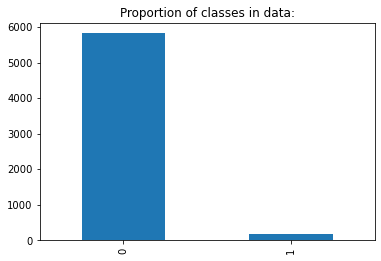

0    0.968064
1    0.031936
Name: sex, dtype: float64


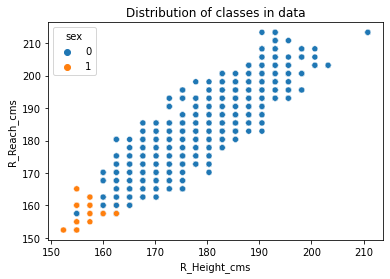

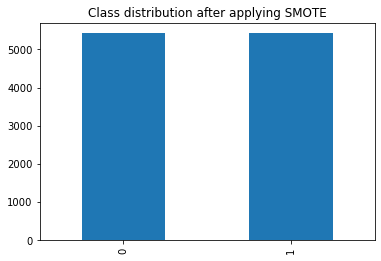

0    0.901364
1    0.901364
Name: sex, dtype: float64


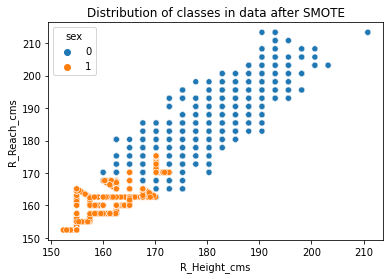

In [11]:
from imblearn.over_sampling import SMOTE
#we install the imbalanced-learn 0.9.0 package
#we import the SMOTE method to oversampling

#we can see that female weight class is under-represented
#we are going to apply the SMOTE method to balance this data

#we create a column Sex where 0 is for male and 1 is for female
#the female is the minority class and the male is the majority class

sex = pd.Series([])
for i in range(len(df_ufc_short)):
    if df_ufc_short['weight_class'][i] == ("WomenStrawweight" or "WomenBantamweight" or "WomenFlyweight" or "WomenFeatherweight"):
        sex[i] = 1
    else:
        sex[i] = 0

#we create a new column 'sex' where 0 is for male and 1 for female
              
df_ufc_short['sex'] = sex
#we add the sex series as a column to the UFC dataframe

ax1 = df_ufc_short['sex'].value_counts().plot.bar()
ax1.set_title('Proportion of classes in data:')
plt.show()
print(df_ufc_short['sex'].value_counts() / len(df_ufc_short))
#we verify that woman sex observations are under represented  

ax2 = sns.scatterplot(data=df_ufc_short, x = 'R_Height_cms', y = 'R_Reach_cms', hue='sex')
ax2.set_title('Distribution of classes in data')
plt.show()
#we check the distribution of classes for two variables 

df_UFC_sm = df_ufc_short.dropna(subset=['R_Height_cms','R_Reach_cms'])
#SMOTE doesn't work with nan values then we have to delete them in a new dataframe

sm = SMOTE()
X_resampled, y_resampled = sm.fit_resample(df_UFC_sm[['R_Height_cms','R_Reach_cms']], df_UFC_sm['sex'])
#we applied de SMOTE method

df_UFC_oversample = pd.DataFrame(X_resampled, columns = ['R_Height_cms','R_Reach_cms'])
df_UFC_oversample['sex'] = y_resampled
#we create a new dataframe with SMOTE observations

ax3 = pd.Series(y_resampled).value_counts().plot(kind='bar', title='Class distribution after applying SMOTE')
plt.show()
print(df_UFC_oversample['sex'].value_counts() / len(df_ufc_short))
#we verify that woman sex observations are now equal represented 

ax4 = sns.scatterplot(data=df_UFC_oversample, x = 'R_Height_cms', y = 'R_Reach_cms', hue='sex')
ax4.set_title('Distribution of classes in data after SMOTE')
plt.show()
#we check the distribution of classes for two variables  



### Exercici 3
#### Continua amb el conjunt de dades de tema esportiu i genera una mostra utilitzant el mètode Reservoir sampling.

In [12]:
import random

#Reservoir sampling is a quota-based random sampling method
#to get a particular sample size when you don’t know the population size (a stream) 
#or to create a sample for a very large data set
#A reservoir sampling without replacement is one where every distinct element has an equal probability of being selected
#A reservoir sampling with replacement is one where every element has the possibility of being chosen for the reservoir more than once

#we create a function according to the reservoir sampling conditions:
def reservoirSampling(stream, n, k):
        i=0;
        # index for elements in stream[]
        # reservoir[] is the output array. 
        #Initialize it with first k elements from stream[]
        reservoir = [0]*k
        for i in range(k):
            reservoir[i] = stream[i]
        # Iterate from the (k+1)th
        # element to nth element
        while(i < n):
            # Pick a random index from 0 to i.
            j = random.randrange(i+1)
        # If the randomly picked index is smaller than k,
        # then replace the element present at the index
        # with new element from stream
            if(j < k):
                reservoir[j] = stream[i]
            i+=1;
        
        return reservoir

stream = df_ufc_short.index
#the stream, in this case it is the index from the dataset
n = len(stream)
#number of elements in the stream
k = 10
#number of samples (example)
    
reservoir_sample = reservoirSampling(stream, n, k)
df_res_sample = pd.DataFrame(df_ufc_short, index=reservoir_sample)
#we apply the reservoir sampling function to our dataframe

print("Following are", k, "randomly selected items by using the Reservoir sampling method:\n")    
print(df_res_sample[['R_fighter','B_fighter','weight_class','Winner']])

Following are 10 randomly selected items by using the Reservoir sampling method:

             R_fighter          B_fighter   weight_class Winner
2297     Jake Matthews          Kevin Lee    Lightweight   Blue
3620  Joseph Benavidez    Jussier Formiga      Flyweight    Red
2072  Joseph Benavidez       Henry Cejudo      Flyweight    Red
4306      Yves Edwards  Rafaello Oliveira    Lightweight    Red
23       Dominick Cruz       Casey Kenney   Bantamweight    Red
5250      Patrick Cote      Kendall Grove   Middleweight    Red
5148  Luigi Fioravanti         Luke Cummo   Welterweight    Red
2491     Travis Browne      Matt Mitrione    Heavyweight    Red
5461       Matt Hughes       Royce Gracie    CatchWeight    Red
1891       Cub Swanson        Artem Lobov  Featherweight    Red
